This is a basic example how to fit for the internal luminosity of the planet based on the method presented in Sarkis+2020. 

We show an example of HD209458b. 

The samples from MCMC and figures are saved in the `HD_209458` directory.

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from bloatedHJs import read_planet_data 
from bloatedHJs import SinglePlanetModel
from bloatedHJs import corner_plot
from bloatedHJs import inference

In [2]:
np.random.seed(1234)

# Load planet data

Data should be given following the format provided in `sys_HD_209458` file. 
The parameters needed in this order and seperated by a comma `,` are:
- name of planet `System`
- planet mass `Mp` and uncertainties `Mperr`
- planet radius `Rp`and uncertainties `Rperr`
- stellar mass `Mstar` and uncertainties `Mstarerr`
- equilibrium temperature `Teq`
- semimajor axis `sma`
- stellar temperature `Tstar` and uncertainties `Tstarerr`
- stellar radius `Rstar` and uncertainties `Rstarerr`

In [3]:
fp = 'data/sys_HD_209458'
data = read_planet_data(fp)
data = data.iloc[0]

In [4]:
sys = fp.split('sys_')[1]
if not os.path.exists(sys):
    os.mkdir(sys)

In [5]:
data

System               HD_209458
Mp                       0.714
Mperr                    0.017
Rp                        1.38
Rperr                    0.017
Mstar                    1.148
Mstarerr                  0.04
Teq                    1457.31
sma                    0.04747
Tstar                     6117
Tstarerr                    50
Rstar                    1.162
Rstarerr                 0.014
Mstar_completo         1.14427
Mstarerr_completo    0.0117492
Name: 0, dtype: object

# Analysis 

Run MCMC to fit for the internal luminosity of the planet (Lumi) given:
- Mp, Rp, and Teq from observations
- and assuming the fraction of heavy elements follows the Mz$-$Mp relation (Thorngren+2016)

In [6]:
# Instantiate MCMC
sp = SinglePlanetModel(data)

In [7]:
# run mcmc
# the default values are 500 steps for burnin and 500 steps as normal chains. 
# MCMC should take around 3 mninutes
samples = sp.run_mcmc()

  0%|          | 0/500 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
           HD_209458_lumilinear_posterior
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Running MCMC -- 50 walkers -- 500 nburn -- 500 nsteps ... 

Running burn-in ...


100%|██████████| 500/500 [01:11<00:00,  8.74it/s]


Acceptance ratio in the burn-in stage ... 0.5844



  0%|          | 0/500 [00:00<?, ?it/s]

Running production chain...


100%|██████████| 500/500 [01:03<00:00,  8.52it/s]


Acceptance ratio 0.50344
MCMC DONE !
Saving samples ... DONE !


# Exploring the output of MCMC

The sampler returns a dataframe.

In [8]:
# name of the columns
samples.columns

Index(['Lumi', 'Mstar', 'Mp', 'Zhomo', 'Epsilon', 'Rp', 'Lstar', 'Teq', 'Tint',
       'Prcb', 'Trcb', 'lnProba'],
      dtype='object')

In [9]:
samples.head()

,Lumi,Mstar,Mp,Zhomo,Epsilon,Rp,Lstar,Teq,Tint,Prcb,Trcb,lnProba
0,2865.108279,1.160028,0.695376,0.196968,3.077445,1.379289,1.789436,1477.047669,606.048046,10.747991,2249.050803,8.985851
1,2331.835612,1.135526,0.714248,0.163148,2.490458,1.383214,1.645786,1446.467757,574.357406,12.277058,2218.240147,10.170214
2,2663.001225,1.162842,0.749726,0.169484,2.851866,1.381342,1.806511,1480.558567,593.827710,11.900692,2248.042095,7.013942
3,1997.874707,1.130948,0.676533,0.160270,2.109567,1.391129,1.619923,1440.751459,553.800769,12.648185,2205.239243,7.171085
4,2680.247392,1.137129,0.734449,0.162723,2.832392,1.390563,1.654909,1448.468258,592.984429,11.548628,2226.486789,9.365755


In [10]:
samples.shape

(25000, 12)

In [11]:
# inference on Lumi
lumi_median, lumi_lower_err, lumi_upper_err = inference(samples['Lumi'])
print('The inferred internal luminosity of the planet is {0:.2f} (+{1:.2f} -{2:.2f}) LJ.'.format(lumi_median, lumi_upper_err, lumi_lower_err))

The inferred internal luminosity of the planet is 2471.37 (+1538.29 -1530.74) LJ.


In [12]:
# inference on epsilon: heating efficiency
epsm, epsl, epsu = inference(samples['Epsilon'])
print('Heating efficiency {0:.2f} (+{1:.2f} -{2:.2f}) LJ.'.format(epsm, epsu, epsl))

Heating efficiency 2.64 (+1.67 -1.63) LJ.


# Corner plots

Make a corner plot of the fitted parameters.

Note: MCMC fits for the internal luminosity (Lumi). Epsilon is computed using the deterministic relation between the luminosity and epsilon.

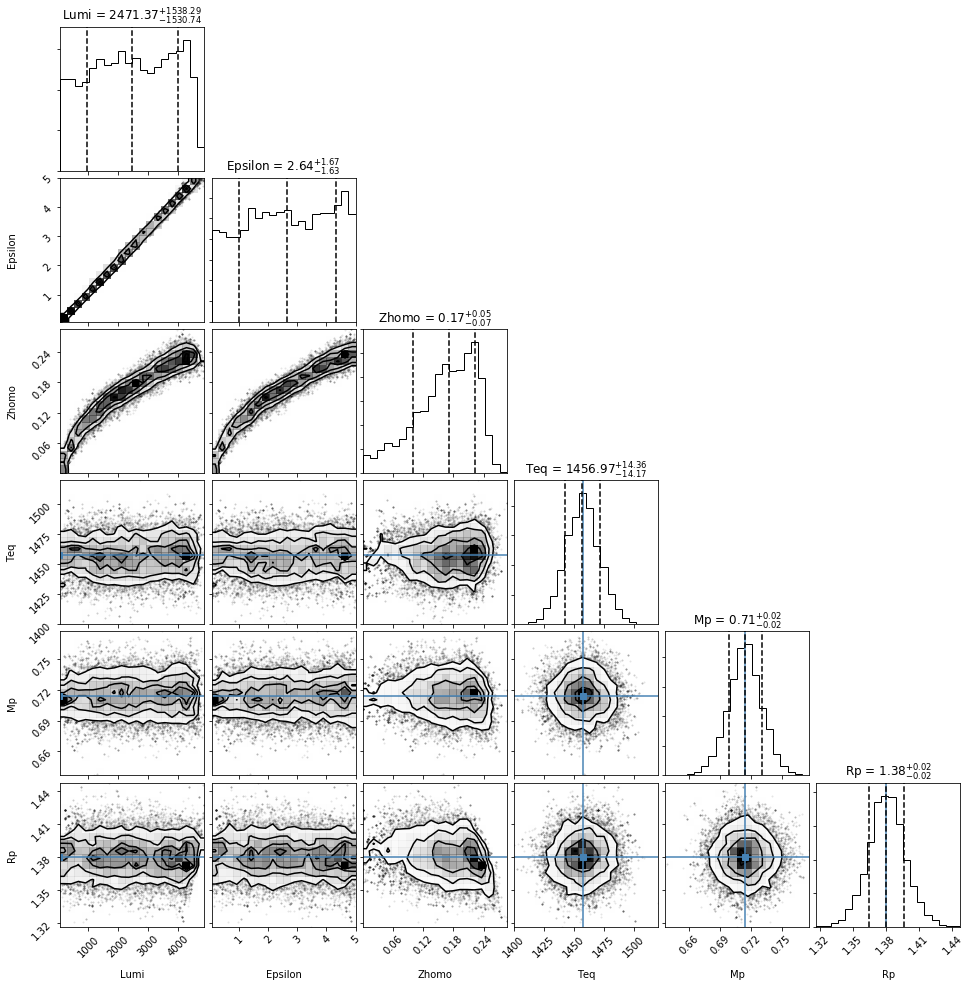

In [13]:
# fitted params
corner_plot(samples, data, outdir=sp.outdir ,outfile=sp.identifier)

Make a corner plot of the derived parameters. These parameters are interpolated using the grid of interior structure models previously computed.

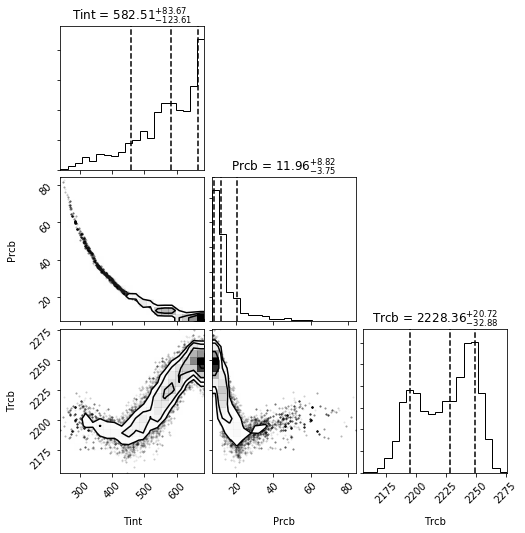

In [14]:
# derived params
corner_plot(samples, data, derived_params=True, outdir=sp.outdir ,outfile=sp.identifier)

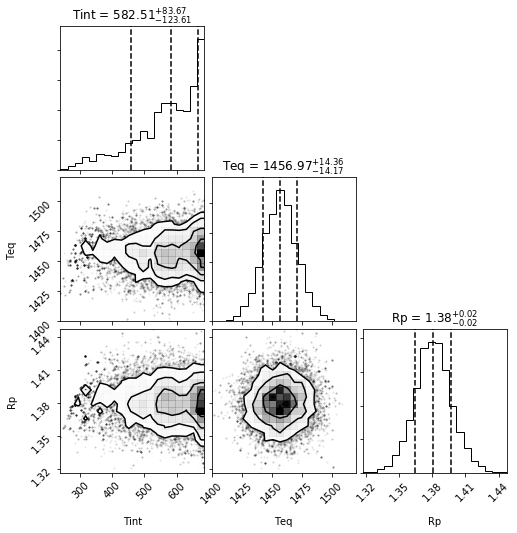

In [15]:
# custom params
selected_columns = ['Tint', 'Teq', 'Rp']
outfile = sp.identifier + '_custom'
corner_plot(samples, data, selected_columns=selected_columns, \
            outdir=sp.outdir, outfile=sp.identifier)